(a) Sobel Filtering with filter2D:

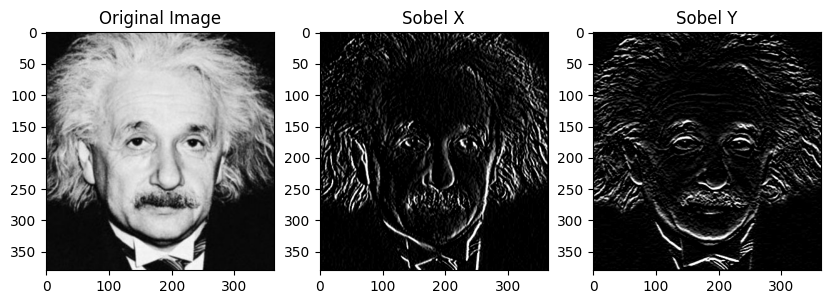

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('utils/einstein.png', cv2.IMREAD_GRAYSCALE)

# Sobel kernels
sobel_x = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

# Apply filter2D with Sobel kernels
sobel_x_image = cv2.filter2D(image, -1, sobel_x)
sobel_y_image = cv2.filter2D(image, -1, sobel_y)

# Combine horizontal and vertical gradients
sobel_combined = cv2.magnitude(sobel_x_image.astype(np.float32), sobel_y_image.astype(np.float32))

# Display the results
plt.figure(figsize=(10,10))
plt.subplot(1, 3, 1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 3, 2), plt.imshow(sobel_x_image, cmap='gray'), plt.title('Sobel X')
plt.subplot(1, 3, 3), plt.imshow(sobel_y_image, cmap='gray'), plt.title('Sobel Y')
#plt.subplot(1, 3, 4), plt.imshow(sobel_combined, cmap='gray'), plt.title('Combined Sobel')
plt.show()


(b) Sobel Filter Manually:

In [ ]:
# Function to manually apply the Sobel operator
def sobel_filter(image):
    sobel_x = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
    sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    
    # Convolve with the Sobel kernels
    sobel_x_image = cv2.filter2D(image, -1, sobel_x)
    sobel_y_image = cv2.filter2D(image, -1, sobel_y)

    # Combine gradients
    sobel_combined = np.hypot(sobel_x_image, sobel_y_image)
    return sobel_combined

# Apply the function
sobel_filtered_image = sobel_filter(image)

# Display the result
plt.imshow(sobel_filtered_image, cmap='gray')
plt.title('Sobel Filtered Image')
plt.show()

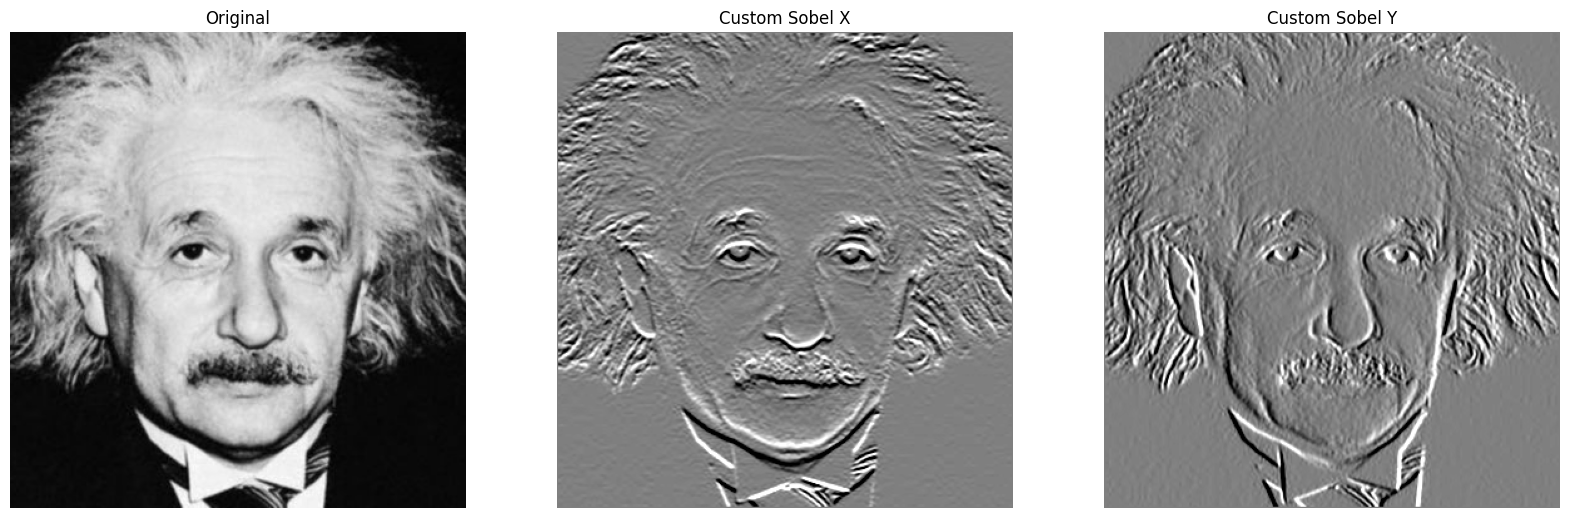

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Custom Sobel filter kernels
sobel_x_custom_kernel = np.array([[1, 2, 1], 
                                  [0, 0, 0], 
                                  [-1, -2, -1]])

sobel_y_custom_kernel = np.array([[1, 0, -1], 
                                  [2, 0, -2], 
                                  [1, 0, -1]])

# Function to apply the custom Sobel filter
def apply_custom_sobel(image, kernel):
    M, N = image.shape
    filtered_image = np.zeros((M, N), dtype=np.float64)

    # Apply the kernel filter (convolution)
    for i in range(1, M-1):
        for j in range(1, N-1):
            window = image[i-1:i+2, j-1:j+2]  # 3x3 neighborhood
            filtered_value = np.sum(window * kernel)  # Convolution operation
            filtered_image[i, j] = filtered_value

    return filtered_image

# Load the Einstein image (make sure to have the correct grayscale image loaded)
# Let's assume 'einstein' is a grayscale image as a numpy array (shape: MxN)
M, N = image.shape
final_image = image.astype(np.float64)

# Apply custom Sobel filters
sobel_x_custom = apply_custom_sobel(final_image, sobel_x_custom_kernel)
sobel_y_custom = apply_custom_sobel(final_image, sobel_y_custom_kernel)

# Clipping values to the valid range [-255, 255] and normalizing to [0, 255]
sobel_x_custom = np.clip(sobel_x_custom, -255, 255)
sobel_y_custom = np.clip(sobel_y_custom, -255, 255)

sobel_image_x_custom = np.uint8(255 * (sobel_x_custom + 255) / 510)
sobel_image_y_custom = np.uint8(255 * (sobel_y_custom + 255) / 510)

# Plot the original and the Sobel-filtered images
fig, axes = plt.subplots(1, 3, figsize=(20, 10))
axes[0].imshow(final_image, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Original')
axes[0].axis(False)

axes[1].imshow(sobel_image_x_custom, cmap='gray')
axes[1].set_title('Custom Sobel X')
axes[1].axis(False)

axes[2].imshow(sobel_image_y_custom, cmap='gray')
axes[2].set_title('Custom Sobel Y')
axes[2].axis(False)

plt.show()

(c) Applying the Property Matrix for Sobel Filtering:

(-0.5, 363.5, 379.5, -0.5)

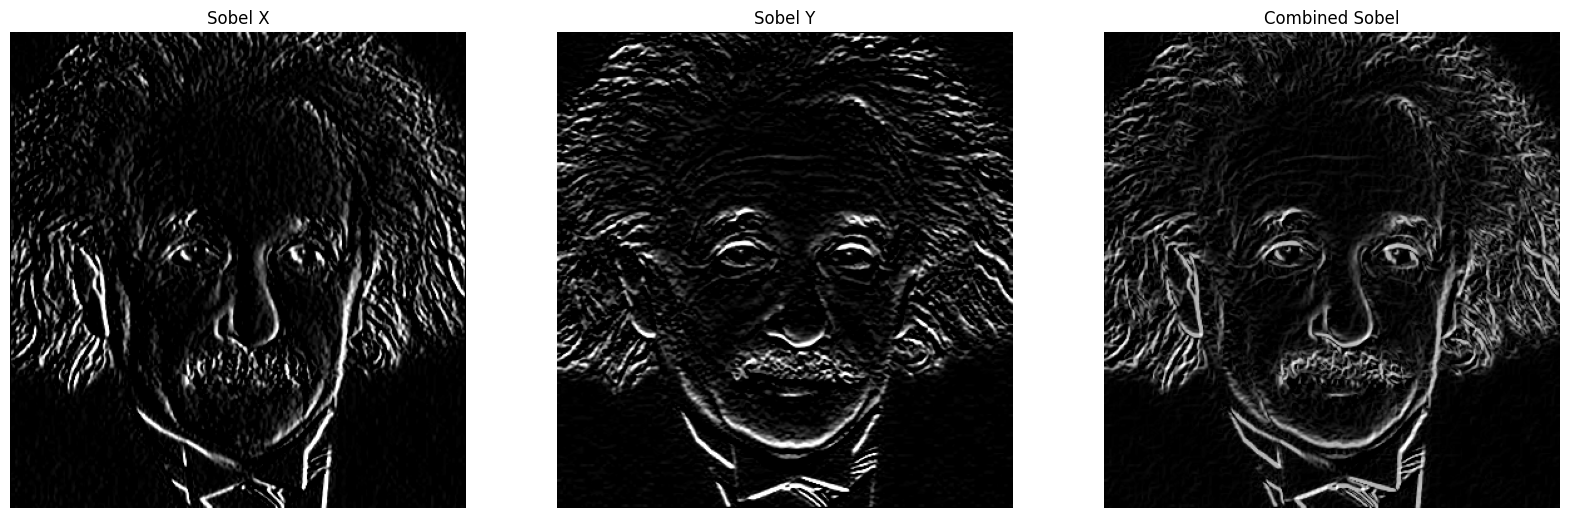

In [6]:
# Apply the simplified Sobel filter using the property matrix
sobel_x_simple = np.array([[1], [2], [1]]) * np.array([[1, 0, -1]])

# Apply convolution with the simplified kernels
sobel_x_filtered = cv2.filter2D(image, -1, sobel_x_simple)
sobel_y_filtered = cv2.filter2D(image, -1, sobel_x.T)  # Use the transpose of sobel_x for vertical filtering

# Combine the results
sobel_combined_simple = cv2.magnitude(sobel_x_filtered.astype(np.float32), sobel_y_filtered.astype(np.float32))

# Plot the original and the Sobel-filtered images
fig, axes = plt.subplots(1, 3, figsize=(20, 10))
axes[0].imshow(sobel_x_filtered, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Sobel X')
axes[0].axis(False)

axes[1].imshow(sobel_y_filtered, cmap='gray')
axes[1].set_title('Sobel Y')
axes[1].axis(False)

axes[2].imshow(sobel_combined_simple, cmap='gray')
axes[2].set_title('Combined Sobel')
axes[2].axis(False)
